In [1]:
%matplotlib inline

In [2]:
%run proof_setup

First we derive the relevant derivatives of the true anomaly using the fact that

$$
M = E - e\,\sin E
$$

implies

$$
\mathrm{d}M = -\sin E\,\mathrm{d}e + (1 - e\,\cos E)\,\mathrm{d}E
$$

$$
\frac{\mathrm{d}E}{\mathrm{d}M} = \frac{1}{1 - e\,\cos E} \quad \mathrm{and} \quad
\frac{\mathrm{d}E}{\mathrm{d}e} = \frac{\sin E}{1 - e\,\cos E}
$$

In [3]:
import sympy as sm

E, e, f = sm.symbols("E, e, f", real=True)

f0 = 2*sm.atan(sm.sqrt(1+e)/sm.sqrt(1-e)*sm.tan(E/2))
E0 = 2*sm.atan(sm.sqrt(1-e)/sm.sqrt(1+e)*sm.tan(f/2))

dEde = sm.sin(E) / (1 - e*sm.cos(E))
dEdM = 1 / (1 - e*sm.cos(E))

dfdE = sm.simplify(sm.diff(f0, E))
print("dfdE(E) =", dfdE)
print("dfdE(f) =", sm.simplify(dfdE.subs([(E, E0)])))

print()

dfdM = sm.simplify(sm.simplify(dfdE * dEdM).expand(trig=True))
print("dfdM(E) =", dfdM)
print("dfdM(f) =", sm.simplify(sm.simplify(dfdM.subs([(E, E0)])).expand(trig=True)))

print()

dfde = sm.simplify(dfdE * dEde + sm.diff(f0, e))
print("dfde(E) =", dfde)
print("dfde(f) =", sm.simplify(sm.simplify(dfde.subs([(E, E0)])).expand(trig=True)))

print()

print("dsinfdf =", sm.diff(sm.sin(f), f))
print("dcosfdf =", sm.diff(sm.cos(f), f))

print("\nduh.")

dfdE(E) = sqrt(-e + 1)*sqrt(e + 1)/(-2*e*cos(E/2)**2 + e + 1)
dfdE(f) = (2*e*cos(f/2)**2 - e + 1)/(sqrt(-e + 1)*sqrt(e + 1))

dfdM(E) = sqrt(-e + 1)*sqrt(e + 1)/(e*cos(E) - 1)**2
dfdM(f) = (-2*e*cos(f/2)**2 + e - 1)**2/((-e + 1)**(3/2)*(e + 1)**(3/2))

dfde(E) = (-(-e + 1)**2*(e + 1)*(e - (e + 1)*tan(E/2)**2 - 1)*sin(E) + 2*(e - 1)*(e*cos(E) - 1)*(-2*e*cos(E/2)**2 + e + 1)*tan(E/2))/((-e + 1)**(3/2)*sqrt(e + 1)*(e*cos(E) - 1)*(e - (e + 1)*tan(E/2)**2 - 1)*(-2*e*cos(E/2)**2 + e + 1))
dfde(f) = -(e*cos(f) + 2)*sin(f)/(e**2 - 1)

dsinfdf = cos(f)
dcosfdf = -sin(f)

duh.


Now let's compare that to the numerical derivatives

In [4]:
import theano
import theano.tensor as tt
import numpy as np
import exoplanet as xo
import matplotlib.pyplot as plt

def compare_grad(M_grad=True):
    M = tt.dvector()
    e = tt.dvector()

    op = xo.theano_ops.kepler.KeplerOp()
    sinf, cosf = op(M, e)
    
    if M_grad:
        M_val = np.linspace(-np.pi, np.pi, 1001)
        e_val = 0.8 + np.zeros_like(M_val)
        x = M_val
        x_obj = M
        label = "M"

    else:
        e_val = np.linspace(0, 0.99, 1000)
        M_val = 0.8 + np.zeros_like(e_val)
        x = e_val
        x_obj = e
        label = "e"

    res = theano.function([M, e], [sinf, cosf])(M_val, e_val)
    dsinf = theano.function([M, e], theano.grad(tt.sum(sinf), [x_obj])[0])(M_val, e_val)
    dcosf = theano.function([M, e], theano.grad(tt.sum(cosf), [x_obj])[0])(M_val, e_val)
    
    plt.figure()
    plt.plot(x, res[0], label="sin(f)")
    plt.plot(x, res[1], label="cos(f)")
    plt.xlabel(label)
    plt.legend()
    
    num_x = 0.5 * (x[:-1] + x[1:])
    num_y = [np.diff(res[0]) / np.diff(x), np.diff(res[1]) / np.diff(x)]
    
    plt.figure()
    plt.plot(num_x, num_y[0], label="numerical")
    plt.plot(x, dsinf, ":", label="analytic")
    plt.xlabel(label)
    plt.ylabel("d sin(f) / d {0}".format(label))
    plt.legend()

    plt.figure()
    plt.plot(num_x, num_y[1], label="numerical")
    plt.plot(x, dcosf, ":", label="analytic")
    plt.xlabel(label)
    plt.ylabel("d cos(f) / d {0}".format(label))
    plt.legend()


First, the derivatives of $\sin f$ and $\cos f$ with respect to $M$:

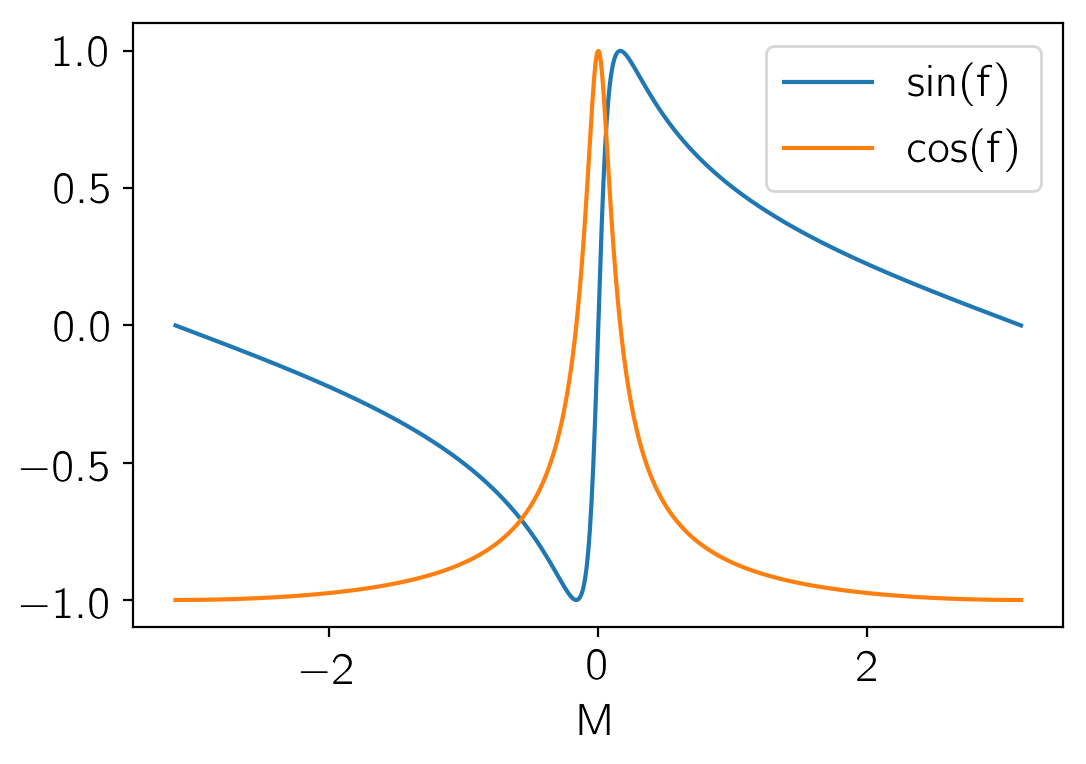

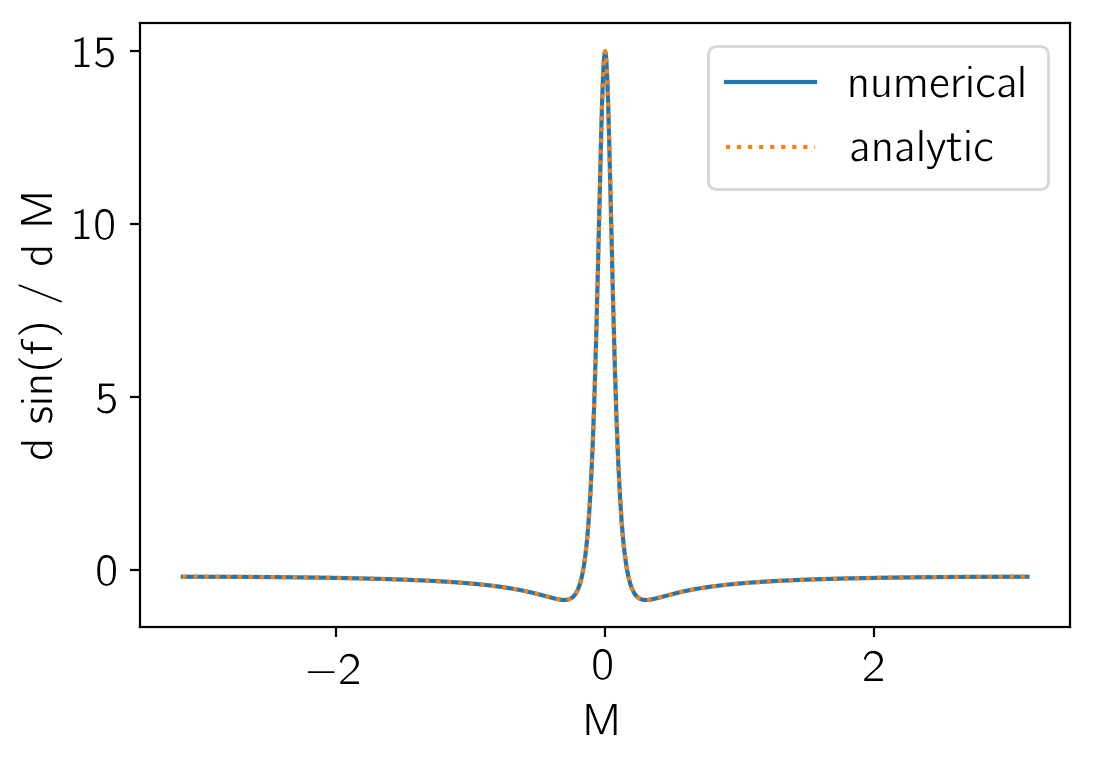

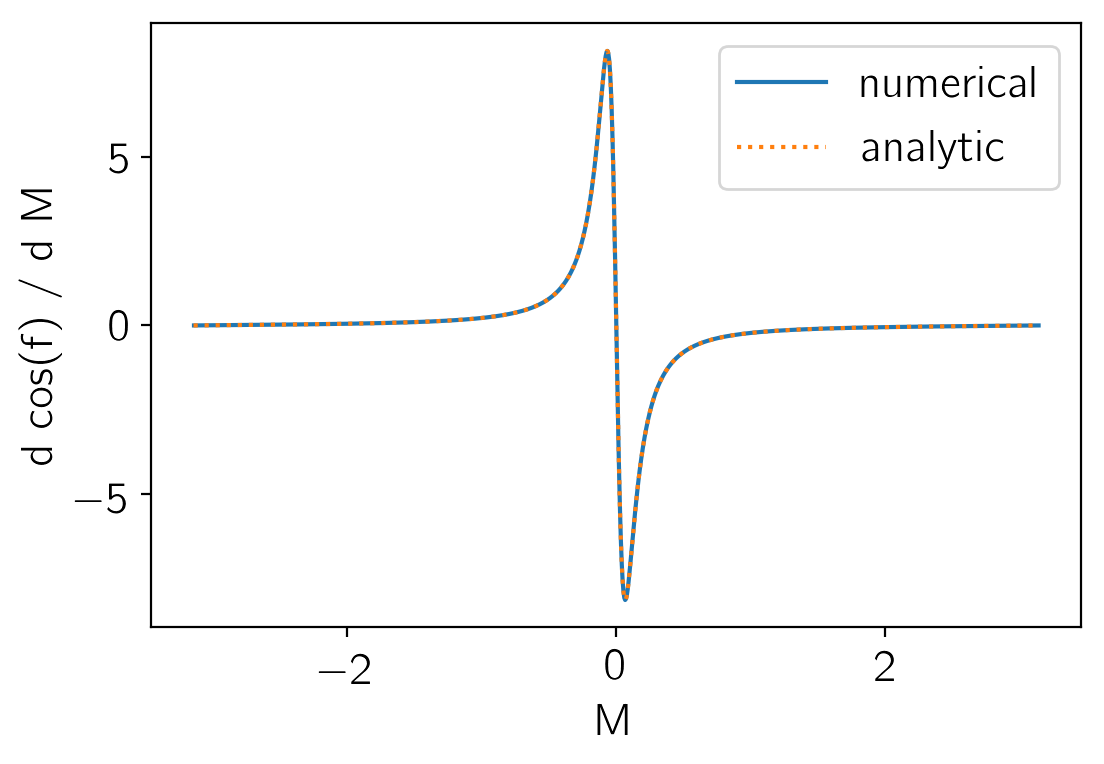

In [5]:
compare_grad()

Then, with respect to $e$:

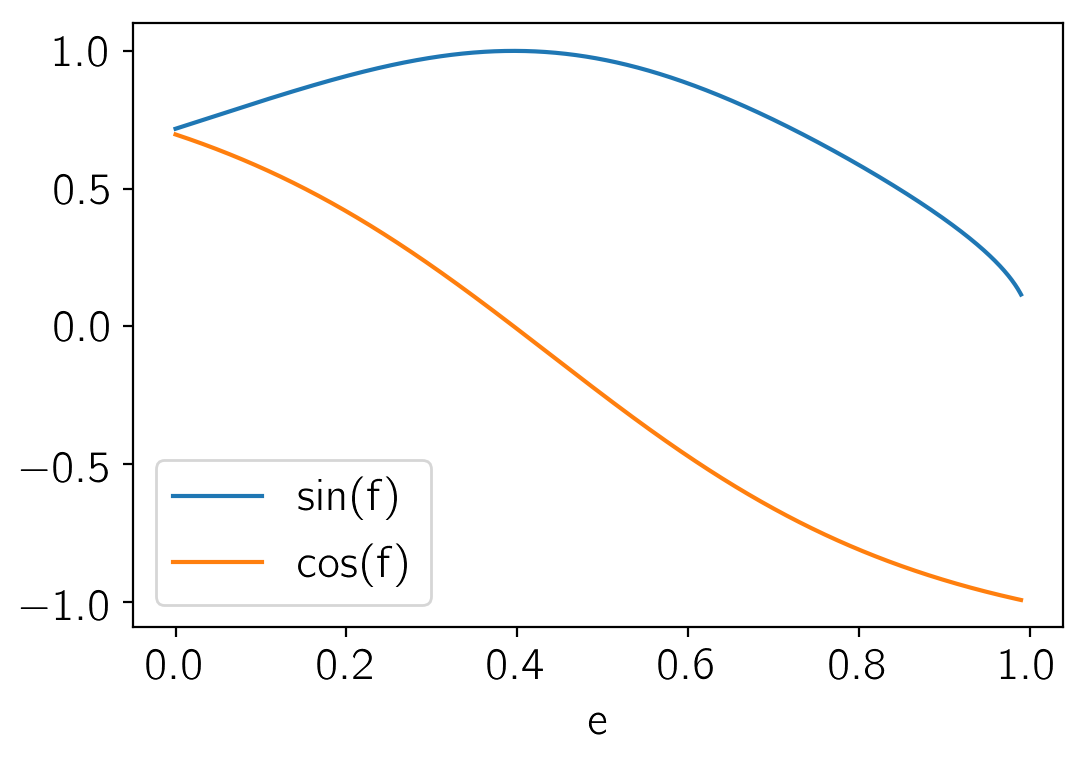

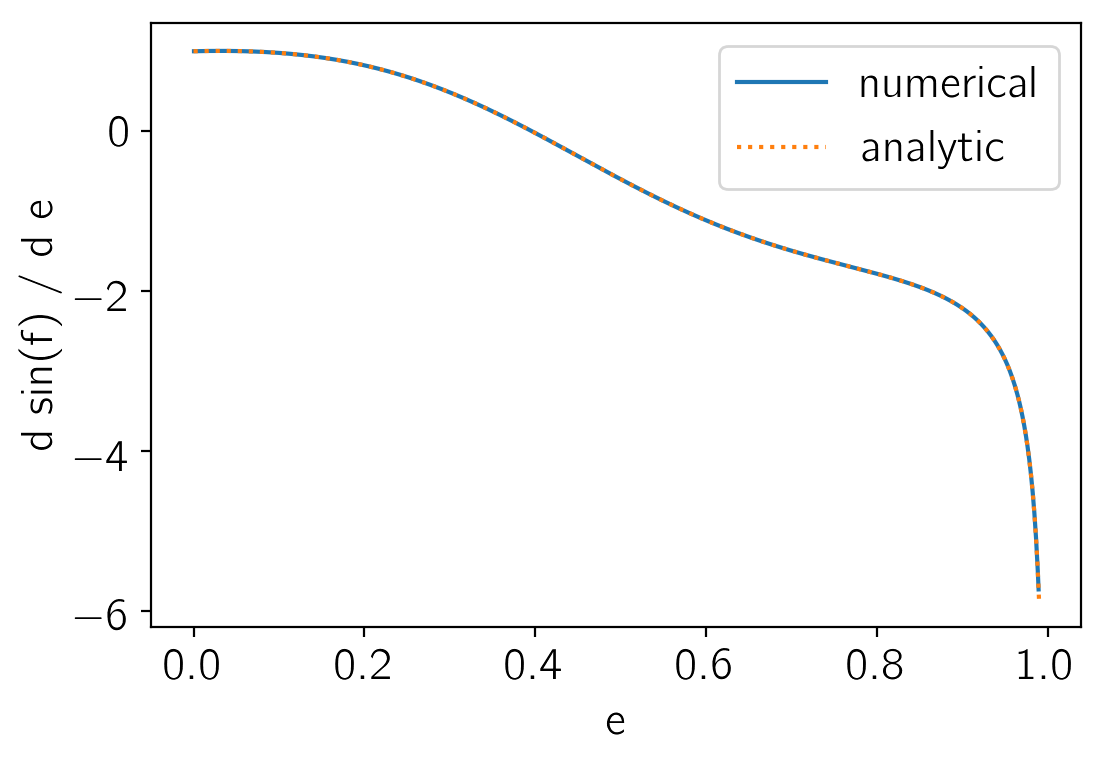

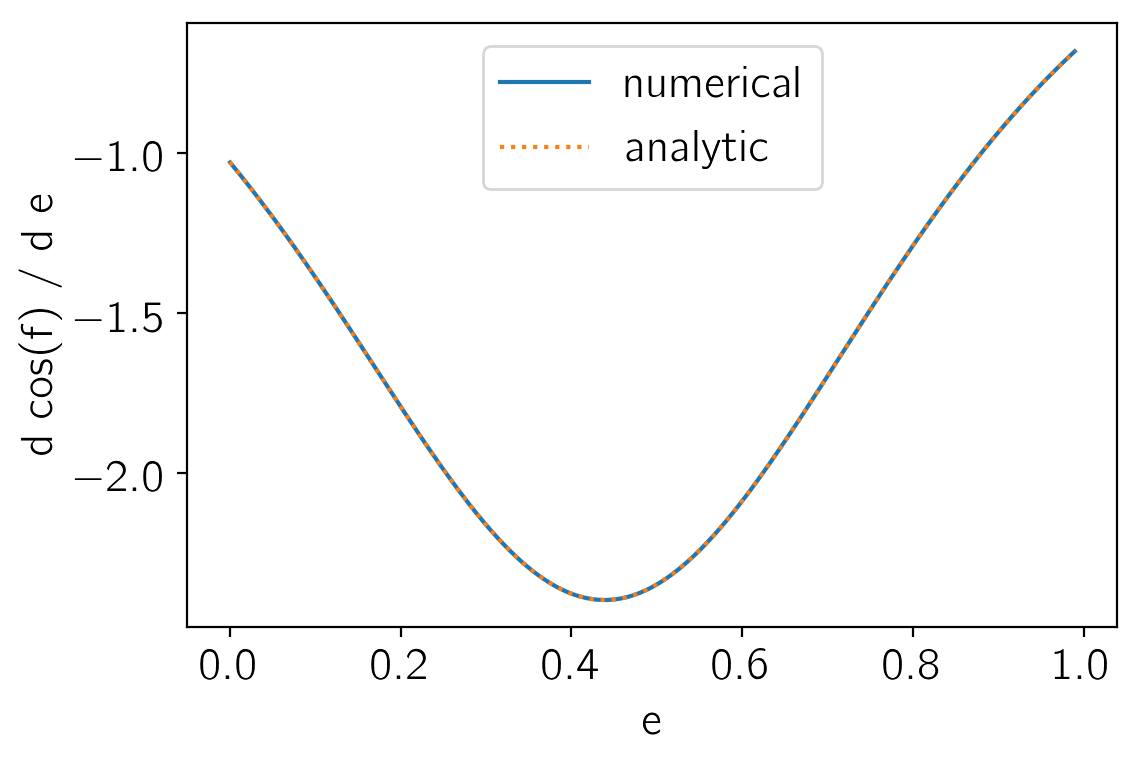

In [6]:
compare_grad(False)